# Simple Linear Regression 1
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
Salary_hike -> Build a prediction model for Salary_hike

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
Salary_Data=pd.read_csv("C:\\ExcelR\\Assignments\\Simple Linear\\Data\\Salary_Data.csv")
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Understanding

In [3]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Correlation Analysis

In [4]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### The features are positively corelated with correlation factor of 0.97

## Performimg Assumption Checks

### 1.Linearity Test

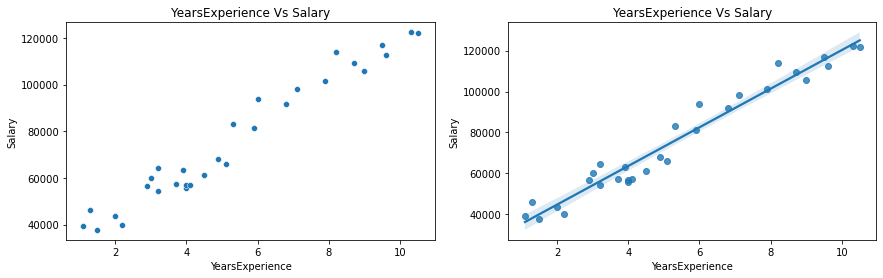

In [5]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.scatterplot(x="YearsExperience",y="Salary",data=Salary_Data,ax=axes[0])
axes[0].set_title("YearsExperience Vs Salary")

sns.regplot(x="YearsExperience",y="Salary",data=Salary_Data,ax=axes[1])
axes[1].set_title("YearsExperience Vs Salary")

plt.show()

#### Linearity test Passed

### 2.Normality Test

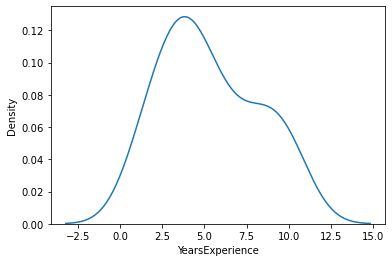

In [6]:
sns.kdeplot(x="YearsExperience",data=Salary_Data)
plt.show()

#### Normality test failed.

#### 3. Multi-collinearity is not applicable
#### 4. No Auto-Regression

## Model Building

In [7]:
from sklearn.linear_model import LinearRegression

X=Salary_Data[["YearsExperience"]]
y=(Salary_Data[["Salary"]]).astype(int)
Linear_model=LinearRegression().fit(X,y)

In [8]:
Linear_model.intercept_

array([25792.20019867])

In [9]:
Linear_model.coef_

array([[9449.96232146]])

## Model Testing

In [10]:
Test=pd.DataFrame(data={"YearsExperience":[7,11,1.5]})
Test

,YearsExperience
0,7.0
1,11.0
2,1.5


In [11]:
pd.DataFrame(Linear_model.predict(Test).astype(int))

,0
0,91941
1,129741
2,39967


## Model Evaluation

In [12]:
Evaluation=Salary_Data
Evaluation["Predicted_Salary"]=(Linear_model.predict(X)).astype(int)
Evaluation["Error"]=(Evaluation["Predicted_Salary"]-Evaluation["Salary"]).astype(int)
Evaluation.head()

,YearsExperience,Salary,Predicted_Salary,Error
0,1.1,39343.0,36187,-3156
1,1.3,46205.0,38077,-8128
2,1.5,37731.0,39967,2236
3,2.0,43525.0,44692,1167
4,2.2,39891.0,46582,6691


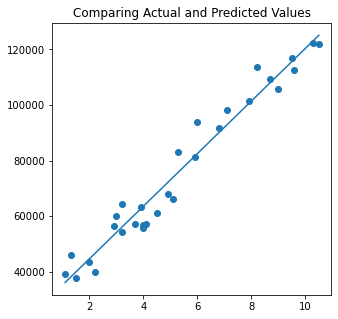

In [13]:
fig=plt.figure(figsize=(5,5))
plt.plot(Evaluation["YearsExperience"],Evaluation["Predicted_Salary"])
plt.scatter(Evaluation["YearsExperience"],Evaluation["Salary"])
plt.title("Comparing Actual and Predicted Values")
plt.show()

## Homoscadasticity Test

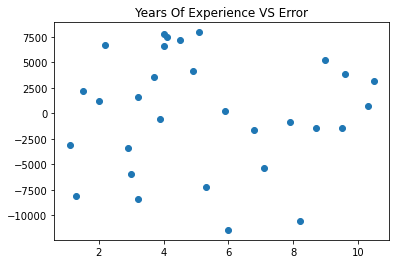

In [14]:
plt.scatter(x="YearsExperience",y="Error",data=Evaluation)
plt.title("Years Of Experience VS Error")
plt.show()

#### Homoscadasticity Check failed

### Residual Mean across Plotted Line

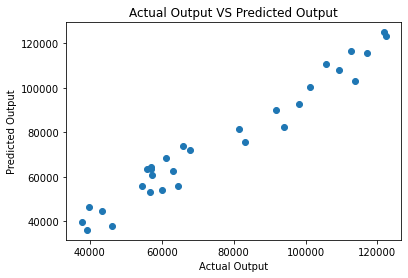

In [15]:
plt.scatter(x="Salary",y="Predicted_Salary",data=Evaluation)
plt.title("Actual Output VS Predicted Output")
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

#### The variations in values are moderate.

## Model Optimization

In [16]:
import numpy as np

X_Log=np.log(X)
X_Sqrt=np.sqrt(X)
X_Cbrt=np.cbrt(X)
X_Inv=1/X

In [17]:
print("R2 Score before Transformation    :",Linear_model.score(X,y))

Linear_Model_Log=LinearRegression().fit(X_Log,y)
print("R2 score after Log Transformation :",Linear_Model_Log.score(X_Log,y))

Linear_Model_sqrt=LinearRegression().fit(X_Sqrt,y)
print("R2 score after sqrt Transformation:",Linear_Model_sqrt.score(X_Sqrt,y))

Linear_Model_cbrt=LinearRegression().fit(X_Cbrt,y)
print("R2 score after cbrt Transformation:",Linear_Model_cbrt.score(X_Cbrt,y))

Linear_Model_Inv=LinearRegression().fit(X_Inv,y)
print("R2 score after Inv Transformation:",Linear_Model_Inv.score(X_Inv,y))

R2 Score before Transformation    : 0.9569566641435086
R2 score after Log Transformation : 0.853888882875697
R2 score after sqrt Transformation: 0.9310009544993526
R2 score after cbrt Transformation: 0.9113098800320786
R2 score after Inv Transformation: 0.5885951068932685


#### R2 scores has no improvement while using Data transformations.

## Model Selection
#### The R2 score for the base model is high compared to the model using tranformed data. Hence, The base model is chosen for deployment

## Model Deployment

In [18]:
from pickle import dump,load
dump(Linear_model,open('Intel_On_Salary.pkl','wb'))

In [19]:
Loaded_Int=load(open('Intel_On_Salary.pkl','rb'))
pd.DataFrame(Loaded_Int.predict(Test).astype(int))

,0
0,91941
1,129741
2,39967
